Today we're recording the same signal at the same time with two Traumschreiber and two receiving devices.

Exp1a: NRF Board - Traumschreiber No 7 

Exp1b: Motorola Phone - Traumschreiber No 8
    


Exp2a: NRF Board - Traumschreiber No 8

Exp2b: Motorola Phone - Traumschreiber No 7

In [9]:

import pandas as pd
import matplotlib.pyplot as plt

import os
import glob

import numpy as np
#from ipynb.fs.full.AppProcessing import *
from itertools import zip_longest
import itertools as itertools

def read_clean_nRF(file, start_with_0 = False):
    df = pd.read_csv(file)
    df.drop(labels = "time", axis = "columns", inplace = True, errors= 'ignore')
    
    df.rename(columns={'Unnamed: 1':'Ch-1', 'Unnamed: 2':'Ch-2', 'Unnamed: 3':'Ch-3', 'Unnamed: 4':'Ch-4', 'Unnamed: 5':'Ch-5', 'Unnamed: 6':'Ch-6'}, inplace=True )
    df = df.divide(3300)
    ## Do something for the pkg id
    
    return df


def prepareCsvForPkgId(input_file, returnjustfile = False):
    """
    Input:
        file (string): Is a csv produced by the app after 11.09.2020 containing info on the package ID. 
    Returns:
        file (dataframe): A kind of cleaned dataframe with an evenly space timestamp as index 
        ids (list): A list with the package ids as ints
        filename (string): The name of the experiment (if the name given from the app, inclusing the timestamp) was used)
    """
    file = pd.read_csv(input_file)
    file = file.iloc[1:]
    file.columns = file.iloc[0]

    file = file[1:].apply(pd.to_numeric, errors='ignore')

    # to evenly set the timestamps 
    length = len(file.index) # length of dataframe
    stop = length*4 # stop point 
    index_evenly = np.linspace(0, stop, num = length, endpoint = False) # to adapt timestamp  
    file.loc[:,"Time"] = index_evenly #set the time as index, relevant for later plotting
    #print(index_evenly)
    #print(file.index.tolist())
    ids= file.index.tolist() # these are all the package ids (as strings because, yes pandas of course we want that as strings, strings are soooo useful..Not)
    ids = [int(one_id) for one_id in ids] # now they are ints
    #print(ids)

    file.set_index('Time', inplace=True)
    # 
    filename = input_file[20:-4]
    if returnjustfile:
        return file
    else:
        return file, ids, filename, index_evenly # no idea why, but the name of the index still includes "Pkg ID", the id not actually the index. Time is .. 

def grouper2(iterable): # from stackoverflow
    prev = None
    group = []
    for item in iterable:
        if not prev or item - prev <= 50: # if the values are in a range of 5, they are in the same cycle (approximately)
            group.append(item)
        else:
            yield group
            group = [item]
        prev = item
    if group:
        yield group

def differenceToNextMeasurement(dataframe, title, cut = False):
    """
    Requires a cleaned up (icluding pkg id) version of an dataframe. Plots only Channel 1 at the moment
    """
    dataframe = dataframe.drop(["Ch-2","Ch-3","Ch-4","Ch-5","Ch-6"], axis=1).dropna(axis=1) 
    print("Not cutting")
    diff = dataframe.diff(axis=0)
    axis = dataframe.index.tolist()
    yaxis = diff["Ch-1"].abs().tolist()
    plt.scatter(x = axis, y = yaxis)
    plt.grid()
    plt.rcParams["figure.figsize"] = (10,7)
    plt.xlabel("Time in msecs")
    plt.ylabel("Absolut difference to next measurement")
    plt.title(title+" Difference to neighbouring measurement")
    #plt.savefig(title+"Differences.png")

    plt.show()  
#     if cut:
#         print("cutting")
#         diff_cut = dataframe.diff(axis=0).abs()
#         #print(diff)
#         diff_cut = diff_cut[(diff_cut <3.7).any(1)]
#         #print(diff)
#         #print(app.index.tolist())
#         #print()
#         axis = diff_cut.index.tolist()
#         yaxis = diff_cut["Ch-1"].abs().tolist()
#         plt.scatter(x = axis, y = yaxis)
#         plt.grid()
#         plt.rcParams["figure.figsize"] = (10,7)
#         plt.xlabel("Time in msecs")
#         plt.ylabel("Absolut difference to next measurement")
#         plt.title(title+" Difference to neighbouring measurement, only displaying differences <3.7")
#         #plt.savefig(title+"DifferencesWithThreshold.png")
#         plt.show()
        
#     else:


In [24]:
extension = 'csv'
all_csv = glob.glob('*.{}'.format(extension))

print(all_csv) # to make sure we have all files 

for each_file in all_csv:
    file = pd.read_csv(each_file)
    file = file.iloc[1:]
    file.columns = file.iloc[0]

    file = file[1:].apply(pd.to_numeric, errors='ignore') 
    print(file.head(), "\n")
    #print(sum(file["Pkg Loss"].tolist()))
    #print("Lost packages for: " ,each_file, "is",  sum(file["Pkg Loss"]) )


['22-09-2020_14-45-40_expno1_tra8.csv', '22-09-2020_14-49-08_expno2_tra7.csv', 'Exp1_Tra7.csv', 'Exp2_Tra8.csv', 'Exp3_Tra3.csv', 'Exp4_Tra8.csv', 'Exp5_Tra3.csv', 'Exp6_Tra8.csv']
Pkg ID  Pkg Loss  Time       Ch-1       Ch-2       Ch-3       Ch-4       Ch-5  \
0              0   0.0   2.123548 -2048.4172 -2016.6887 -2055.8403 -2056.0903   
1              0   1.0   5.242118 -2049.5900 -2016.8690 -2056.3280 -2056.5640   
2              0   3.0   8.358900 -2048.8364 -2017.6844 -2056.9148 -2057.1306   
3              0   5.0  11.337112 -2047.0076 -2017.3346 -2055.9736 -2056.1912   
4              0   6.0  14.049508 -2050.2197 -2019.7379 -2057.0037 -2057.2275   

Pkg ID       Ch-6  Ch-7  Ch-8  NaN  NaN  NaN  NaN  
0      -2059.4023   NaN   NaN  NaN  NaN  NaN  NaN  
1      -2059.8596   NaN   NaN  NaN  NaN  NaN  NaN  
2      -2060.4524   NaN   NaN  NaN  NaN  NaN  NaN  
3      -2059.5215   NaN   NaN  NaN  NaN  NaN  NaN  
4      -2060.5295   NaN   NaN  NaN  NaN  NaN  NaN   

Pkg ID  Pkg Loss  

Not cutting


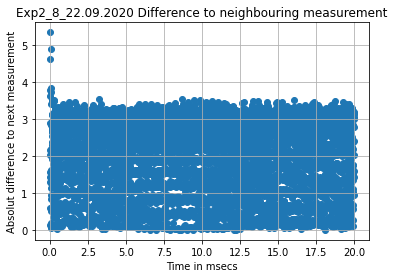

In [26]:
Exp1_7 = read_clean_nRF("Exp1_Tra7.csv")
#Exp1_7["Ch-1"].iloc[200:500].plot(grid = True, marker='o', figsize = (50,20))

Exp2_8 = read_clean_nRF("Exp2_Tra8.csv")
differenceToNextMeasurement(Exp2_8.iloc[0:5000], "Exp2_8_22.09.2020")

       Difference
0.020    4.611515
0.040    5.336667
0.044    3.764848
0.056    3.844545
0.060    4.891515
0.080    3.711212
For ~~ and its 9582 measured data points, 6 are abnormal. The ratio is 0.001. The jumps occur in 1 parts of the signal
last timestamp  38.324000000000524
this many entries: 9582
This should cover a timespan of  38328


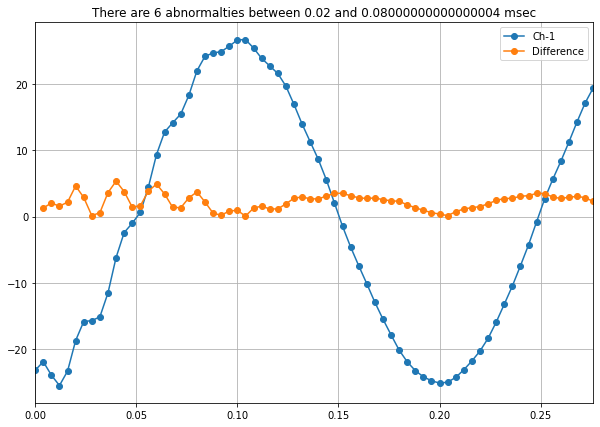

In [35]:
#name = justTheFile[20:-4]
justTheFile =  Exp2_8
def plotJumps(justTheFile):
    dif_plot = justTheFile.drop(["Ch-2","Ch-3","Ch-4","Ch-5", "Ch-6"], axis=1).dropna(axis=1) 
    dif_plot
    dif_plot["Difference"] =dif_plot.diff(axis=0).abs()
    dif_df = dif_plot.drop(["Ch-1"], axis =1)


    bigger = dif_df[(dif_df >3.7).any(1)]
    print(bigger)
    biggest_differences_df = bigger["Difference"].nlargest(n=100)
    bd_list = biggest_differences_df.index.tolist() #list of the timestamp when the biggest difference occur
    sortedList = sorted(bd_list)


    DictOfJumps = dict(enumerate(grouper2(sortedList), 1))
    ratio = round( len(bigger.index)/len(dif_plot.index),3)
    print("For ~~ and its {} measured data points, {} are abnormal. The ratio is {}. The jumps occur in {} parts of the signal".format(len(dif_plot.index),len(bigger.index),ratio,len(DictOfJumps)))


    for key, value in DictOfJumps.items():

        first_jump = value[0]
        first_jump_pos = int(first_jump/4)
        last_jump = value[-1]
        last_jump_pos = int(last_jump/4)
        plot_from = first_jump_pos -45
        if plot_from < 0:
            plot_from = 0
        plot_to = last_jump_pos +70
        if plot_to > len(dif_plot.index):
            plot_to = len(dif_plot.index)
        #print("from", plot_from, "to", plot_to)
        dif_plot.iloc[plot_from:plot_to].plot(marker ='o', title = "There are {} abnormalties between {} and {} msec".format(len(value),first_jump, last_jump),grid = True)
        plt.savefig("Exp2_8_from"+str(first_jump)+"_to_"+str(last_jump)+'_msec.png')
plotJumps(Exp2_8)


time = Exp2_8.index.tolist()

#print(time[0], time[250],time[500],time[750],time[1000],time[1250],time[1500], time[1750],time[2000],time[2250],time[2500])

#twofifty = [time[0], time[250],time[500],time[750],time[1000],time[1250],time[1500], time[1750],time[2000],time[2250],time[2500]]
#twofifty.reverse()

print("last timestamp ",time[-1])
print("this many entries:", len(time))
#print("package lost:", sum(file["Pkg Loss"])/3)
# print("This many entries we have plus the ones that got lost", len(time) + (sum(file["Pkg Loss"])/3))
print("This should cover a timespan of ", len(time)*4)
#print("What the TS thinks we should have",(len(time)+sum(file["Pkg Loss"])/3)*4)


In [13]:
Exp3_3 = read_clean_nRF("Exp3_Tra3.csv")
Exp3_3
#plotJumps(Exp3_3)

,Ch-1,Ch-2,Ch-3,Ch-4,Ch-5,Ch-6,Unnamed: 7
0.000,-24.283939,-1238.868182,1.480606,688.923636,-691.109394,1.735758,NaN
0.004,-23.177576,-1240.968182,1.386061,316.025152,-317.069697,-0.468788,NaN
0.008,-25.319091,-1239.523030,1.440606,-76.797273,76.064242,-1.171818,NaN
0.012,-26.533030,-1237.854545,1.638788,-110.463636,108.995152,0.031212,NaN
0.016,-23.906667,-1239.489697,1.617576,189.961212,-192.211818,1.676364,NaN
0.020,-19.039091,-1243.865758,1.546970,489.681818,-491.916667,1.521212,NaN
0.024,-15.923030,-1247.745152,1.462121,247.583333,-249.093636,0.020909,NaN
0.028,-15.552424,-1249.073939,1.437576,16.735758,-17.996970,-0.436667,NaN
0.032,-15.240303,-1248.764848,1.603030,-1.802121,0.173030,0.205758,NaN
0.036,-11.903333,-1251.235758,1.499697,171.242727,-173.075455,1.066364,NaN


       Difference
0.020    4.472424
0.040    5.369394
0.056    3.789394
0.060    5.038788
For ~~ and its 8333 measured data points, 4 are abnormal. The ratio is 0.0. The jumps occur in 1 parts of the signal


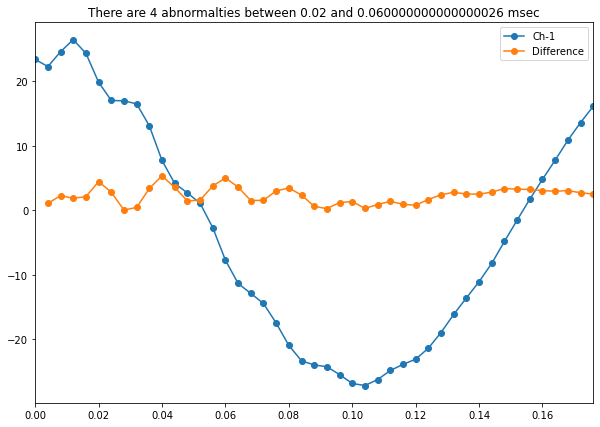

In [55]:
Exp4_8 = read_clean_nRF("Exp4_Tra8.csv")
plotJumps(Exp4_8)

        Difference
0.016     4.122727
0.020     5.002424
0.040     4.336061
2.020     3.951212
2.520     3.800909
3.120     3.726061
3.828     3.754545
4.132     3.716970
4.428     3.868485
6.208     3.717879
6.424     3.831515
6.720     3.739697
7.220     3.947273
8.232     3.918788
8.412     3.772121
9.424     3.877879
12.036    3.879697
12.728    3.728485
14.132    3.749697
16.020    3.764242
17.024    3.734545
17.928    3.902121
18.224    3.907879
18.832    3.787879
19.324    3.712727
20.632    3.840000
22.028    3.855758
24.436    3.925758
27.024    3.814545
27.524    3.810000
29.028    3.942121
29.432    3.710909
29.528    3.807273
30.040    3.817879
30.220    3.811515
30.828    3.710000
32.020    3.701818
32.628    3.754242
34.024    3.759697
34.428    3.726061
34.632    3.780000
35.036    3.860909
35.824    3.941212
36.732    3.916364
37.328    3.766061
37.624    3.798788
For ~~ and its 9925 measured data points, 46 are abnormal. The ratio is 0.005. The jumps occur in 1 parts o

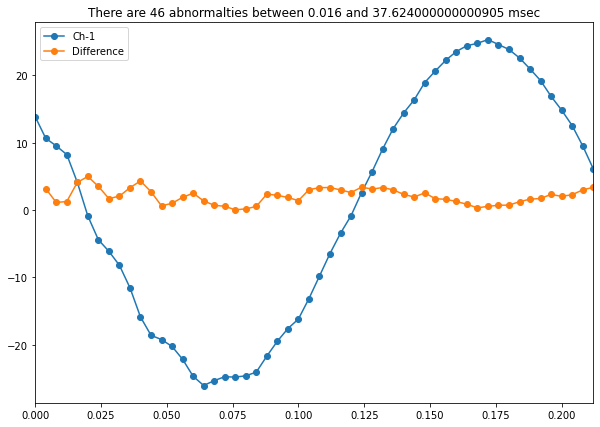

In [56]:
Exp5_3 = read_clean_nRF("Exp5_Tra3.csv")
plotJumps(Exp5_3)

        Difference
7.312     3.768182
12.308    3.709091
23.408    3.783636
24.912    3.727273
27.820    3.768788
For ~~ and its 8627 measured data points, 5 are abnormal. The ratio is 0.001. The jumps occur in 1 parts of the signal


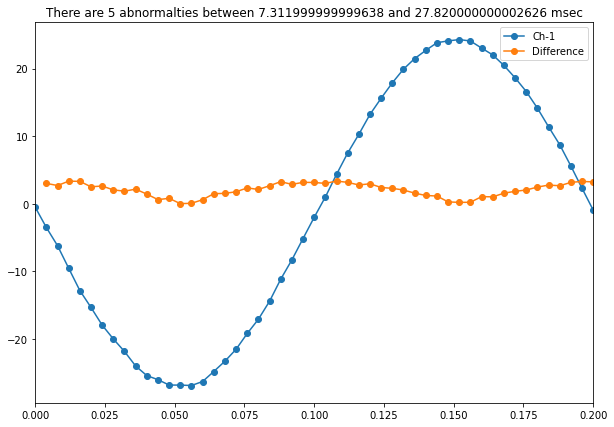

In [57]:
Exp6_8 = read_clean_nRF("Exp6_Tra8.csv")
plotJumps(Exp6_8)